# Mentoring 1 - Introduction to Machine Learning
---

Mentoring Session - Job Preparation Program - Pacmann AI

## Instructions
---

1. Please fill all the given tasks in here
2. You can use any library
3. For modeling, please use `sklearn` library
4. You are taksed to create a function based machine learning model. (If you cannot create the functions from the start, you can create without a function first, then put it all into a function)
5. Make sure you are following all the function descriptions
6. Submit your result to the submission form

## Dataset Description
---

**Note**

- This dataset originally comes from [Uber Fares Dataset](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset)
- We perform several edit for this mentoring purposes. So, please use the dataset from [here](https://drive.google.com/file/d/1-Fr3OMbI1yKU_jNy-6cgXFJDVzjph3sn/view?usp=sharing).


**Description**
- We're looking to predict the fare of Uber's transactions.
- The dataset contains of the following fields

<center>

|Feature|Type|Descriptions|
|:--|:--|:--|
|`order_id`| `int` | a unique identifier for each trip|
|`pickup_time` | `str` | a class of pickup time. `04-10`, `10-16`, `16-22`, `22-04`. E.g. `04-10` means the pickup time is between 04.00 to 10.00|
| `pickup_longitude` | `float` | the longitude where the meter was engaged|
| `pickup_latitude` | `float` | the latitude where the meter was engaged|
| `dropoff_longitude` | `float` | the longitude where the meter was disengaged|
| `dropoff_latitude` | `float` | the latitude where the meter was disengaged|
| `passenger_count` | `float` | the number of passengers in the vehicle (driver entered value)|
| `fare_amount` | `int` | the cost of each trip in USD, (**our target**)|

## Modeling Workflow
---

```
1. Import data to Python
2. Data Preprocessing
3. Training a Machine Learning Models
4. Test Prediction
```

### 1. Import data to Python (10 pts)
---

In [2]:
####################################################
# Import Numpy and Pandas library
# Write your code here
####################################################
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
####################################################
# Create a function named read_data
# - Has an input of filename, i.e. fname
# - Read the data as a Pandas DataFrame
# - Drop duplicate on `order_id`, keep the last ones
# - Set `order_id` as index
# - Print the data shape
# - Return the dataset
# Write your code here
####################################################
def read_data(fname):
    """
    Read and preprocess the dataset.
    
    Parameters:
    - fname (str): The filename of the dataset to be read.
    
    Returns:
    - pd.DataFrame: The processed dataset.
    """
    with open(fname, 'r') as f: 
        df = pd.read_csv(f, sep=',', header=0)
        print(f'Data shape rawd: {df.shape}')

        # Drop duplicate on `order_id`, keep the last ones
        # Set `order_id` as index
        df = df.drop_duplicates(subset='order_id', keep='last') 
        df_count_dup = df.duplicated(subset='order_id').sum()
        print(f'Number of duplicate order id: {df_count_dup}')
        print(f'Data shape after dropping: {df.shape}')
        
        df =df.set_index('order_id', inplace=False)
        print(f'Data shape final: {df.shape}')

        return df

In [3]:
# Read the Uber data (JUST RUN THE CODE)
data = read_data(fname='uber_edit.csv')

Data shape rawd: (194814, 8)
Number of duplicate order id: 0
Data shape after dropping: (194814, 8)
Data shape final: (194814, 7)


In [4]:
# JUST RUN THE CODE
data.head()

,fare_amount,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,,,
24238194,7.5,16-22,-73.999817,40.738354,-73.999512,40.723217,1.0
27835199,7.7,16-22,-73.994355,40.728225,-73.994710,40.750325,1.0
44984355,12.9,16-22,-74.005043,40.740770,-73.962565,40.772647,1.0
25894730,5.3,04-10,-73.976124,40.790844,-73.965316,40.803349,3.0
17610152,16.0,16-22,-73.925023,40.744085,-73.973082,40.761247,5.0


### 2. Data Preprocessing (60 pts)
---

**The processing pipeline**
```
2.1 Input-Output Split
2.2 Train-Valid-Test Split
2.3 Separate Numerical and Categorical Features
2.4 Numerical Imputation
2.5 Categorical Imputation
2.6 Preprocess Categorical Features
2.7 Join the Data
2.8 Feature Engineering the Data
2.9 Create a Preprocessing Function
```

#### 2.1. Input-Output Split (6 pts)
---

- We're going to split input & output according to the modeling objective.
- Create a function to split the input & output

In [5]:
####################################################
# Create a function named split_input_output
# - Has two arguments
#   - data, a pd Dataframe
#   - target_col, a column (str)
# - Print the data shape after splitting
# - Return X, y
# Write your code here
####################################################
def split_input_output(data, target_col):
    """
    Splits the input data into features (X) and target (y).

    Parameters:
    - data (pd.DataFrame): The input dataset.
    - target_col (str): The name of the target column.

    Returns:
    - X (pd.DataFrame): The feature columns.
    - y (pd.Series): The target column.
    """
    X = data.drop(columns=[target_col])
    y = data[target_col]
    print(f'X shape: {X.shape}')
    print(f'y shape: {y.shape}')
    
    return X, y

In [6]:
# Load the train data only (JUST RUN THE CODE)
X, y = split_input_output(data=data,
                          target_col='fare_amount')

X shape: (194814, 6)
y shape: (194814,)


In [7]:
X.head()  # (JUST RUN THE CODE)

,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,,
24238194,16-22,-73.999817,40.738354,-73.999512,40.723217,1.0
27835199,16-22,-73.994355,40.728225,-73.994710,40.750325,1.0
44984355,16-22,-74.005043,40.740770,-73.962565,40.772647,1.0
25894730,04-10,-73.976124,40.790844,-73.965316,40.803349,3.0
17610152,16-22,-73.925023,40.744085,-73.973082,40.761247,5.0


In [8]:
y.head()  # (JUST RUN THE CODE)

order_id
24238194     7.5
27835199     7.7
44984355    12.9
25894730     5.3
17610152    16.0
Name: fare_amount, dtype: float64

#### 2.2. Train-Valid-Test Split (6 pts)
---

- Now, we want to split the data before modeling.
- Split the data into three set:
  - Train, for training the model
  - Validation, for choosing the best model
  - Test, for error generalization

- You should make the splitting proportion train (80%), valid (10%), and test (10%)

In [9]:
####################################################
# Create a function named split_train_test
# - Has two arguments
#   - X, the input (pd.Dataframe)
#   - y, the output (pd.Dataframe)
#   - test_size, the test size between 0-1 (float)
#   - seed, the random state (int)
# - Print the data shape after splitting
# - Return X_train, X_test, y_train, y_test
# - You can use an sklearn library to help you
# Write your code here
####################################################
def split_train_test(X, y, test_size, seed):
    """
    Split the input data (X) and target data (y) into train and test sets.

    Parameters:
    - X (pd.DataFrame): The input features.
    - y (pd.DataFrame or pd.Series): The target labels.
    - test_size (float): The proportion of the dataset to include in the test split (0-1).
    - seed (int): The random seed for reproducibility.

    Returns:
    - X_train (pd.DataFrame): Training input data.
    - X_test (pd.DataFrame): Testing input data.
    - y_train (pd.DataFrame or pd.Series): Training output data.
    - y_test (pd.DataFrame or pd.Series): Testing output data.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
        
    print(f'X train shape: {X_train.shape}')
    print(f'y train shape: {y_train.shape}')
    print(f'X test shape : {X_test.shape}')
    print(f'y test shape : {y_test.shape}\n')

    return X_train, X_test, y_train, y_test

In [10]:
# Split the data
# First, split the train & not train
X_train, X_not_train, y_train, y_not_train = split_train_test(X, y, test_size=0.2, seed=123) # WRITE YOUR CODE HERE, Use seed=123

# Then, split the valid & test
X_valid, X_test, y_valid, y_test = split_train_test(X_not_train, y_not_train, test_size=0.5, seed=123) # WRITE YOUR CODE HERE, Use seed=123

X train shape: (155851, 6)
y train shape: (155851,)
X test shape : (38963, 6)
y test shape : (38963,)

X train shape: (19481, 6)
y train shape: (19481,)
X test shape : (19482, 6)
y test shape : (19482,)



In [11]:
# Validate (JUST RUN THE CODE)
print(len(X_train)/len(X))  # should be 0.8
print(len(X_valid)/len(X))  # should be 0.1
print(len(X_test)/len(X))   # should be 0.1

0.7999989733797366
0.09999794675947314
0.1000030798607903


In [12]:
X_train.head()  # (JUST RUN THE CODE)

,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,,
51655713,16-22,-73.979392,40.735734,-73.906281,40.745539,2.0
37525839,16-22,-73.986575,40.761473,-73.981880,40.768660,5.0
55058970,16-22,-73.972533,40.782260,-73.952761,40.708980,1.0
15663447,10-16,-73.979967,40.751612,-73.976313,40.758427,6.0
13325650,16-22,-73.976192,40.744026,-73.980935,40.733946,1.0


#### 2.3. Separate Numerical and Categorical Features (6 pts)
---

- We now prepare to perform data preprocessing
- But, we first separate the data into numerical data & categorical data.

In [13]:
####################################################
# Create a function to split numerical & categorical input
# - you have three parameters
#   - data, an input data (pd. Dataframe)
#   - num_cols, a list of numerical columns (list)
#   - cat_cols, a list of categorical columns (list)
# - and write a validation that you perform right operation
# - and return two dataframe, numerical & categorical data
# Write your code here
####################################################
def split_num_cat(data, num_cols,cat_cols):
    """
    Split the input DataFrame into numerical and categorical DataFrames based on the provided lists of columns.

    Parameters:
    - data: pd.DataFrame, the input data.
    - num_cols: list, a list of numerical columns.
    - cat_cols: list, a list of categorical columns.

    Returns:
    - numerical_cols: pd.DataFrame.
    - categorical_cols: pd.DataFrame.
    """
    # Validate that the input columns exist in the DataFrame
    for col in num_cols + cat_cols:
        if col not in data.columns:
            raise ValueError(f"Column '{col}' not found in the input DataFrame.")

    # Validate that there is no overlap between numerical and categorical columns
    overlap = set(num_cols).intersection(set(cat_cols))
    if overlap:
        raise ValueError(f"Columns {overlap} are present in both numerical and categorical lists.")

    # Split the data into numerical and categorical DataFrames
    numerical_cols = data[num_cols]
    categorical_cols = data[cat_cols]

    print(f'Data num shape: {numerical_cols.shape}')
    print(f'Data cat shape: {categorical_cols.shape}')
    
    return numerical_cols, categorical_cols

num_cols = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']
cat_cols = ['pickup_time']

In [14]:
# Split the data
X_train_num, X_train_cat = split_num_cat(X_train, num_cols, cat_cols) # WRITE YOUR CODE HERE

Data num shape: (155851, 5)
Data cat shape: (155851, 1)


In [15]:
X_train_num.head()  # (JUST RUN THE CODE)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,
51655713,-73.979392,40.735734,-73.906281,40.745539,2.0
37525839,-73.986575,40.761473,-73.981880,40.768660,5.0
55058970,-73.972533,40.782260,-73.952761,40.708980,1.0
15663447,-73.979967,40.751612,-73.976313,40.758427,6.0
13325650,-73.976192,40.744026,-73.980935,40.733946,1.0


In [16]:
X_train_cat.head()  # (JUST RUN THE CODE)

,pickup_time
order_id,
51655713,16-22
37525839,16-22
55058970,16-22
15663447,10-16
13325650,16-22


#### EDA before Preprocessing (JUST RUN THE CODE)
---

- Find the number of missing values

In [17]:
100 * (X_train.isna().sum(0) / len(X_train))

pickup_time          0.000000
pickup_longitude     0.000000
pickup_latitude      0.000000
dropoff_longitude    0.000000
dropoff_latitude     0.000000
passenger_count      0.606348
dtype: float64

- We will impute all these variables if there is any missing value

- First, check the numerical features distribution

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

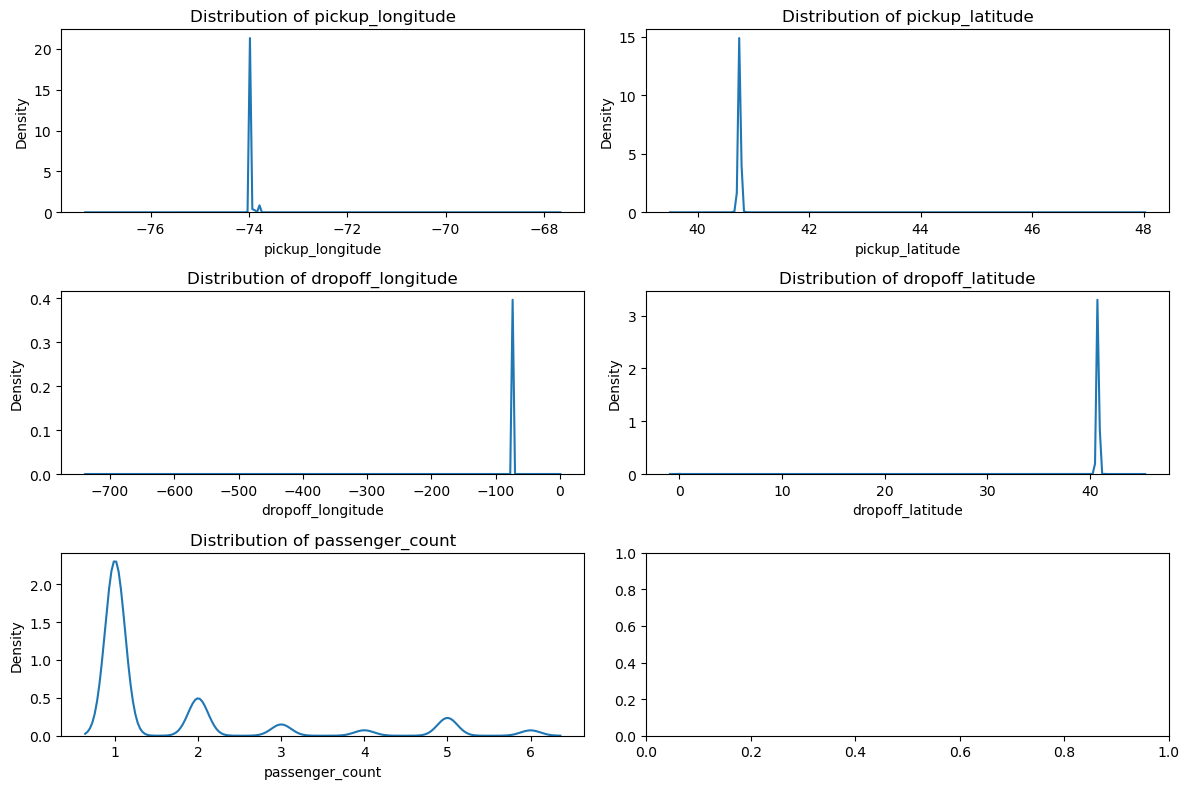

In [19]:
# Plot histogram
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(X_train_num.columns):
    sns.kdeplot(X_train_num[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

- All the distribution are skewed, we can impute a missing value by its features median.

- Next, explore the `pickup_time`

In [20]:
X_train['pickup_time'].value_counts(normalize=True)

pickup_time
16-22    0.328160
10-16    0.286376
22-04    0.221648
04-10    0.157599
-        0.006217
Name: proportion, dtype: float64

- There's a missing value with symbol `'-'` in `pickup_time`,
- We can impute the missing value with `UNKNOWN`

- Explore the relation between `pickup_time` and `fare`

In [21]:
# Concat the data first
train_data = pd.concat((X_train, y_train), axis=1)
train_data.head()

,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
order_id,,,,,,,
51655713,16-22,-73.979392,40.735734,-73.906281,40.745539,2.0,16.5
37525839,16-22,-73.986575,40.761473,-73.981880,40.768660,5.0,3.7
55058970,16-22,-73.972533,40.782260,-73.952761,40.708980,1.0,18.9
15663447,10-16,-73.979967,40.751612,-73.976313,40.758427,6.0,4.1
13325650,16-22,-73.976192,40.744026,-73.980935,40.733946,1.0,5.0


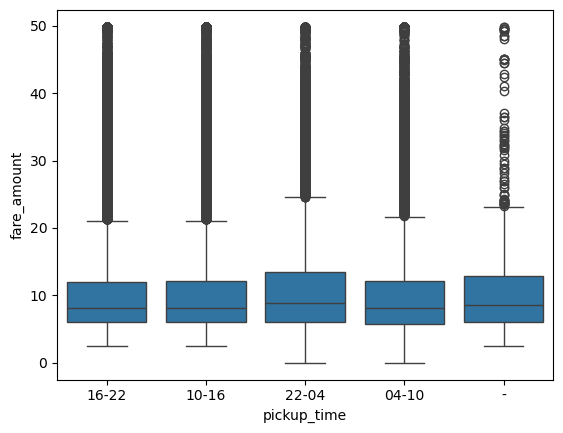

In [22]:
# Create a boxplot
sns.boxplot(data=train_data[train_data['fare_amount'] < 50],
            x='pickup_time',
            y='fare_amount')
plt.show()

- There is no significant fare different between `pickup_time`.
- We can perform a one hot encoding for this data.

**Conclusion for preprocessing**
- Impute the missing `passenger_counts` with its median
- Impute the missing `pickup_time` with `'UNKNOWN'`
- Feature engineering the `dropoff` and `pickup` coordinate to be a distance between pickup and dropoff. We can use an Euclidean distance for simplicity.

#### 2.4. Numerical Imputation (6 pts)
---

- Now, let's perform a numerical imputation
- First check the missing value of the numerical data

In [23]:
# Check missing value (JUST RUN THE CODE)
X_train_num.isna().sum(0)

pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
passenger_count      945
dtype: int64

- Create a function to fit a numerical features imputer

In [24]:
####################################################
# Create function to fit & transform numerical imputers
# The fit function is called by num_imputer_fit
# - it needs 1 input, the data (pd.DataFrame)
# - the missing value is np.nan
# - the imputation strategy is median
# - it return the imputer
#
# The transform function is called by num_imputer_transform
# - it needs 2 input, data (pd.DataFrame) and imputer (sklearn object)
# - it return the imputed data in pd.DataFrame format
#
# Write your code here
####################################################
def num_imputer_fit(data):
    """
    Fit a numerical imputer.
    
    Parameters:
    - data (pd.DataFrame): The input DataFrame containing numerical data.
        
    Returns:
    - SimpleImputer: The fitted imputer.
    """
    
    fit_data = SimpleImputer(strategy='median').fit(data)

    return fit_data

def num_imputer_transform(data, imputer):
    """
    Transform the numerical data using a fitted imputer.
    
    Parameters:
    - data (pd.DataFrame): The input DataFrame containing numerical data.
    - imputer (SimpleImputer): The fitted imputer.
        
    Returns:
    - pd.DataFrame: The DataFrame with imputed values.
    """
    transform_data = pd.DataFrame(imputer.transform(data),
                                  columns=data.columns, index=data.index)

    return transform_data

- Perform imputation

In [25]:
# Get the numerical imputer
num_imputer = num_imputer_fit(X_train_num) # WRITE YOUR CODE HERE

# Transform the data
X_train_num_imputed = num_imputer_transform(X_train_num, num_imputer) # WRITE YOUR CODE HERE

In [26]:
# Validate (JUST RUN THE CODE)
X_train_num_imputed.isna().sum(0)

pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

Great!

#### 2.5. Categorical Imputation (6 pts)
---

- Next, let's perform the categorical imputation

In [27]:
# Check missing value (JUST RUN THE CODE)
X_train_cat.value_counts(normalize=True)

pickup_time
16-22          0.328160
10-16          0.286376
22-04          0.221648
04-10          0.157599
-              0.006217
Name: proportion, dtype: float64

- Create a function to fit a categorical features imputer

In [28]:
####################################################
# Create function to fit & transform categorical imputers
# The fit function is called by cat_imputer_fit
# - it needs 1 input, the data (pd.DataFrame)
# - the missing value is '-'
# - the imputation strategy is filling it with 'UNKNOWN'
# - it return the imputer
#
# The transform function is called by cat_imputer_transform
# - it needs 2 input, data (pd.DataFrame) and imputer (sklearn object)
# - it return the imputed data in pd.DataFrame format
#
# Write your code here
####################################################
def cat_imputer_fit(data):
    """
    Fits a SimpleImputer for categorical variables.
    
    Parameters:
    - data (pd.DataFrame): Input data containing categorical variables
    
    Returns:
    - SimpleImputer: Fitted imputer object
    """
    fit_data = SimpleImputer(missing_values='-',
                             strategy='constant',
                             fill_value='UNKNOWN')
    fit_data.fit(data)
    
    return fit_data

def cat_imputer_transform(data, imputer):
    """
    Transforms data using a fitted categorical imputer.
    
    Parameters:
    - data (pd.DataFrame): Input data to transform
    - imputer (SimpleImputer): Fitted imputer object
    
    Returns:
    - pd.DataFrame: Transformed data with imputed values
    """
    imputed_data = imputer.transform(data)
    transform_data = pd.DataFrame(imputed_data,
                                  columns=data.columns, 
                                  index=data.index)

    return transform_data

- Perform imputation

In [29]:
# Perform categorical imputation
cat_imputer = cat_imputer_fit(X_train_cat) # WRITE YOUR CODE HERE

# Transform
X_train_cat_imputed = cat_imputer_transform(X_train_cat, cat_imputer) # WRITE YOUR CODE HERE

In [30]:
# Validate (JUST RUN THE CODE)
X_train_cat_imputed.value_counts(normalize=True)

pickup_time
16-22          0.328160
10-16          0.286376
22-04          0.221648
04-10          0.157599
UNKNOWN        0.006217
Name: proportion, dtype: float64

In [31]:
X_train_cat_imputed.head()

,pickup_time
order_id,
51655713,16-22
37525839,16-22
55058970,16-22
15663447,10-16
13325650,16-22


Great!

#### 2.6. Preprocess Categorical Features (6 pts)
---

- We will create a one-hot-encoder (read the `EDA before processing`) for the categorical features
- Create a function to perform a one hot encoder

In [32]:
####################################################
# Write two functions to perform OHE for the categorical data
# The first function is called cat_encoder_fit
# - It needs 1 input, the data (pd.DataFrame)
# - You create an encoder (from OHE Sklearn)
# - input all categories of the categorical data
# - if there is other category outside the categories listed right now, ignore it
# - return the encoder
#
# The second function is called cat_encoder_transfrom
# - It needs two input, the data (pd.DataFrame), the encoder (sklearn object)
# - It transform the input data based on the encoder
# - It returns the encoded data (pd.DataFrame)
#
# Write your code here
####################################################
def cat_encoder_fit(data):
    """
    Fit a OneHotEncoder for categorical data.
    
    Parameters:
    - data (pd.DataFrame): The input DataFrame containing categorical data.
        
    Returns:
    - OneHotEncoder: The fitted encoder.
    """
    encoder = OneHotEncoder(sparse_output=False)
    fit_data = encoder.fit(data[['pickup_time']])

    return fit_data

def cat_encoder_transform(data, encode):
    """
    Transform the categorical data using a fitted encoder.
    
    Parameters:
    - data (pd.DataFrame): The input DataFrame containing categorical data.
    - encode (OneHotEncoder): The fitted encoder.
        
    Returns:
    - pd.DataFrame: The transformed data as a DataFrame.
    """
    encoder = encode
    encoded = encoder.transform(data)
    transform_data = pd.DataFrame(encoded, columns=encoder.categories_[0])
    transform_data.index = data.index
        
    return transform_data

- Perform imputation

In [33]:
# Perform categorical imputation
cat_encoder = cat_encoder_fit(X_train_cat_imputed) # WRITE YOUR CODE HERE

# Transform
X_train_cat_encoded = cat_encoder_transform(X_train_cat_imputed, cat_encoder) # WRITE YOUR CODE HERE

In [34]:
# Validate  (JUST RUN THE CODE)
print('Original shape:', X_train_cat_imputed.shape)
print('Encoded shape :', X_train_cat_encoded.shape)

Original shape: (155851, 1)
Encoded shape : (155851, 5)


In [35]:
# Validate  (JUST RUN THE CODE)
X_train_cat_encoded.head()

,04-10,10-16,16-22,22-04,UNKNOWN
order_id,,,,,
51655713,0.0,0.0,1.0,0.0,0.0
37525839,0.0,0.0,1.0,0.0,0.0
55058970,0.0,0.0,1.0,0.0,0.0
15663447,0.0,1.0,0.0,0.0,0.0
13325650,0.0,0.0,1.0,0.0,0.0


In [36]:
# Validate  (JUST RUN THE CODE)
X_train_cat_imputed.head()

,pickup_time
order_id,
51655713,16-22
37525839,16-22
55058970,16-22
15663447,10-16
13325650,16-22


Great!

#### 2.7. Join the data (6 pts)
---

- After all the data is filled (numerically), we can join the data
- Create a function to join the data

In [37]:
####################################################
# Create a function to join / concat the data
# The function is called by concat_data
# - It needs two input, num_data (pd.DataFrame) and cat_data (pd.DataFrame)
# - Don't forget to validate your process
# - It returns the concated data
#
# Write your code here
####################################################
def concat_data(num_data, cat_data):
    """
    Concatenate numerical and categorical data.
    
    Parameters:
    - num_data (pd.DataFrame): DataFrame containing numerical data.
    - cat_data (pd.DataFrame): DataFrame containing categorical data.
        
    Returns:
    - pd.DataFrame: Concatenated DataFrame.
    """
    concated_data = pd.concat([num_data, cat_data], axis=1)
    
    print(f'Numerical data shape  : {num_data.shape}')
    print(f'Categorical data shape: {cat_data.shape}')
    print(f'Concat data shape     : {concated_data.shape}')

    return concated_data

- Perform concatenated

In [38]:
# Concat the data
X_train_concat = concat_data(X_train_num_imputed, X_train_cat_encoded) # WRITE YOUR CODE HERE

Numerical data shape  : (155851, 5)
Categorical data shape: (155851, 5)
Concat data shape     : (155851, 10)


In [39]:
# Validate (JUST RUN THE CODE)
X_train_concat.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,04-10,10-16,16-22,22-04,UNKNOWN
order_id,,,,,,,,,,
51655713,-73.979392,40.735734,-73.906281,40.745539,2.0,0.0,0.0,1.0,0.0,0.0
37525839,-73.986575,40.761473,-73.981880,40.768660,5.0,0.0,0.0,1.0,0.0,0.0
55058970,-73.972533,40.782260,-73.952761,40.708980,1.0,0.0,0.0,1.0,0.0,0.0
15663447,-73.979967,40.751612,-73.976313,40.758427,6.0,0.0,1.0,0.0,0.0,0.0
13325650,-73.976192,40.744026,-73.980935,40.733946,1.0,0.0,0.0,1.0,0.0,0.0


Great!

#### 2.8. Feature engineering the data (8 pts)
---

- Now, `pickup` and `dropoff` coordinate is not an explicit features.
- We can create a better feature called by `distance` to summarize the `pickup` and `dropoff` coordinate.

In [40]:
####################################################
# Create a function that obtain the distance
# The function is called with map_distance
# - It needs an input, data (pd.DataFrame)
# - In the input, you calculate the trip distance using Euclidean Distance
#   ref: https://www.cuemath.com/euclidean-distance-formula/
# - Then, you can save the distance information as a new column, 'distance'
# - And you can drop the pickup and dropoff latitude and longitude
# - You return the mapped data
#
# Write your code here
####################################################
def map_distance(data):
    """
    Calculate the Euclidean distance between pickup and dropoff points
    and add it as a new column. Drop latitude and longitude columns.
    
    Parameters:
    - data (pd.DataFrame): DataFrame containing latitude and longitude information. 
                Must include columns: 'pickup_latitude', 'pickup_longitude', 
                'dropoff_latitude', 'dropoff_longitude'.
            
    Returns:
    - pd.DataFrame: DataFrame with a new column 'distance' and without latitude/longitude columns.
    """
    data['distance'] = np.sqrt(
        (data['dropoff_latitude'] - data['pickup_latitude'])**2 +
        (data['dropoff_longitude'] - data['pickup_longitude'])**2
    )

    data.drop(columns=['dropoff_latitude','pickup_latitude','dropoff_longitude','pickup_longitude'], inplace=True)

    return data


- Perform distance calculation (4 pts)

In [41]:
# Calculate the distance
X_train_concat_fe = map_distance(X_train_concat) # WRITE YOUR CODE HERE

In [42]:
# Validate (JUST RUN THE CODE)
X_train_concat_fe.head()

,passenger_count,04-10,10-16,16-22,22-04,UNKNOWN,distance
order_id,,,,,,,
51655713,2.0,0.0,0.0,1.0,0.0,0.0,0.073766
37525839,5.0,0.0,0.0,1.0,0.0,0.0,0.008585
55058970,1.0,0.0,0.0,1.0,0.0,0.0,0.075901
15663447,6.0,0.0,1.0,0.0,0.0,0.0,0.007733
13325650,1.0,0.0,0.0,1.0,0.0,0.0,0.011140


- And finally, we standardize the data so that it can perform well during model optimization (4 pts)

In [43]:
####################################################
# Create two functions to perform scaling & transform scaling
# The scaling is Standardization
# The first function is to fit the scaler, called by fit_scaler
# - You need an input, a data (pd.Dataframe)
# - You create a standardization scaler (please use sklearn)
# - Your output is the scaler
#
# The second function is to transform data using scaler, called by transform_scaler
# - There are two inputs, a data (pd.Dataframe), a scaler (sklearn object)
# - You scaled the data, then return the scaled data
# Write your code here
####################################################
def fit_scaler(data):
    """
    Fit a StandardScaler to the given data.
    
    Parameters:
    - data (pd.DataFrame): The input data to fit the scaler.
        
    Returns:
    - StandardScaler: The fitted scaler.
    """
    fit_data = StandardScaler().fit(data)

    return fit_data

def transform_scaler(data, scaled):
    """
    Transform the given data using the fitted scaler.
    
    Parameters:
    - data (pd.DataFrame): The input data to be transformed.
    - scaled (StandardScaler): The fitted scaler.
        
    Returns:
    - pd.DataFrame: Scaled data in the same format as the input DataFrame.
    """
    transformed_data = scaled.transform(data)
    transform_data = pd.DataFrame(transformed_data, columns=data.columns, index=data.index)

    return transform_data

In [44]:
# Fit the scaler
scaler = fit_scaler(X_train_concat_fe) # WRITE YOUR CODE HERE

# Transform the scaler
X_train_clean = transform_scaler(X_train_concat_fe, scaler) # WRITE YOUR CODE HERE

In [45]:
# Validate (JUST RUN THE CODE)
X_train_clean.describe().round(4)

,passenger_count,04-10,10-16,16-22,22-04,UNKNOWN,distance
count,155851.0000,155851.0000,155851.0000,155851.0000,155851.0000,155851.0000,155851.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-0.5267,-0.4325,-0.6335,-0.6989,-0.5336,-0.0791,-0.0383
25%,-0.5267,-0.4325,-0.6335,-0.6989,-0.5336,-0.0791,-0.0340
50%,-0.5267,-0.4325,-0.6335,-0.6989,-0.5336,-0.0791,-0.0311
75%,0.2412,-0.4325,1.5786,1.4308,-0.5336,-0.0791,-0.0256
max,3.3130,2.3120,1.5786,1.4308,1.8739,12.6427,218.5245


Great!

#### 2.9. Create the preprocess function (10 pts)
---

- Now, let's create a function to preprocess other set of data (valid & test) so that we can predict that

In [46]:
####################################################
# Create a function to preprocess the dataset
# You called the function preprocess_data
# - It needs many input
#   - data, pd.DataFrame
#   - num_cols, the numerical columns, list
#   - cat_cols, the categorical columns, list
#   - num_imputer, the numerical imputer, sklearn object
#   - cat_imputer, the categorical imputer, sklearn object
#   - cat_encoder, the categorical encoder, sklearn object
#   - scaler, the data scaler, sklearn object
# - You preprocess the data following step 2.3 - 2.8
# - You return the clean data
#
# Write your code here
####################################################
def preprocess_data(data, num_cols, cat_cols, num_imputer, cat_imputer, cat_encoder, scaler):
    """
    Preprocess the dataset by imputing missing values, encoding categorical variables, and scaling numerical variables.

    Parameters:
    - data: pd.DataFrame, the input data.
    - num_cols: list, the numerical columns.
    - cat_cols: list, the categorical columns.
    - num_imputer: sklearn object, the numerical imputer.
    - cat_imputer: sklearn object, the categorical imputer.
    - cat_encoder: sklearn object, the categorical encoder.
    - scaler: sklearn object, the data scaler.

    Returns:
    - clean_data: pd.DataFrame, the preprocessed data.
    """
    # Validate that the input columns exist in the DataFrame
    for col in num_cols + cat_cols:
        if col not in data.columns:
            raise ValueError(f"Column '{col}' not found in the input DataFrame.")

    # Validate that there is no overlap between numerical and categorical columns
    overlap = set(num_cols).intersection(set(cat_cols))
    if overlap:
        raise ValueError(f"Columns {overlap} are present in both numerical and categorical lists.")

    # Split the data into numerical and categorical DataFrames
    X_train_num = data[num_cols]
    X_train_cat = data[cat_cols]

    # Fit a numerical features imputer
    num_imputed = pd.DataFrame(num_imputer.transform(X_train_num),
                                  columns=X_train_num.columns, index=X_train_num.index)
    print(f'Numerical data shape  : {num_imputed.shape}')
    
    #  Fit a categorical features imputer
    cat_imputed = pd.DataFrame(cat_imputer.transform(X_train_cat),
                                  columns=X_train_cat.columns, 
                                  index=X_train_cat.index)

    # Create a one-hot-encoder for the categorical features
    cat_encoded = pd.DataFrame(cat_encoder.transform(cat_imputed), columns=cat_encoder.categories_[0])
    cat_encoded.index = cat_imputed.index 
    print(f'Categorical data shape: {cat_encoded.shape}')

    # Join / concat the data
    concated_data = pd.concat([num_imputed, cat_encoded], axis=1)
    print(f'Concat data shape     : {concated_data.shape}\n')
    
    print(f'Original data shape: {concated_data.shape}')

    # Create a better feature to summarize the pickup and dropoff coordinate.
    concated_data['distance'] = np.sqrt(
        (concated_data['dropoff_latitude'] - concated_data['pickup_latitude'])**2 +
        (concated_data['dropoff_longitude'] - concated_data['pickup_longitude'])**2
    )

    concated_data.drop(columns=['dropoff_latitude','pickup_latitude','dropoff_longitude','pickup_longitude'], inplace=True)

    # Standardize the data so that it can perform well during model optimization
    clean_data = pd.DataFrame(scaler.transform(concated_data), columns=concated_data.columns, index=concated_data.index)
    print(f'Mapped data shape  : {clean_data.shape}\n')
        
    return clean_data

num_cols = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']
cat_cols = ['pickup_time']

In [47]:
# Preprocess the data training again
X_train_clean = preprocess_data(data=X_train,
                                num_cols=num_cols, 
                                cat_cols=cat_cols, 
                                num_imputer=num_imputer, 
                                cat_imputer=cat_imputer, 
                                cat_encoder=cat_encoder, 
                                scaler=scaler) # WRITE YOUR CODE HERE 

Numerical data shape  : (155851, 5)
Categorical data shape: (155851, 5)
Concat data shape     : (155851, 10)

Original data shape: (155851, 10)
Mapped data shape  : (155851, 7)



In [48]:
# Validate (JUST RUN THE CODE)
print('Original data shape:', X_train.shape)
print('Cleaned data shape :', X_train_clean.shape)
X_train_clean.head()

Original data shape: (155851, 6)
Cleaned data shape : (155851, 7)


,passenger_count,04-10,10-16,16-22,22-04,UNKNOWN,distance
order_id,,,,,,,
51655713,0.241233,-0.432531,-0.633481,1.430838,-0.533634,-0.079097,-0.013978
37525839,2.545080,-0.432531,-0.633481,1.430838,-0.533634,-0.079097,-0.035436
55058970,-0.526715,-0.432531,-0.633481,1.430838,-0.533634,-0.079097,-0.013275
15663447,3.313029,-0.432531,1.578579,-0.698891,-0.533634,-0.079097,-0.035716
13325650,-0.526715,-0.432531,-0.633481,1.430838,-0.533634,-0.079097,-0.034594


In [49]:
# Transform other set of data
X_valid_clean = preprocess_data(data=X_valid,
                                num_cols=num_cols, 
                                cat_cols=cat_cols, 
                                num_imputer=num_imputer, 
                                cat_imputer=cat_imputer, 
                                cat_encoder=cat_encoder, 
                                scaler=scaler)# WRITE YOUR CODE HERE
X_test_clean = preprocess_data(data=X_test,
                                num_cols=num_cols, 
                                cat_cols=cat_cols, 
                                num_imputer=num_imputer, 
                                cat_imputer=cat_imputer, 
                                cat_encoder=cat_encoder, 
                                scaler=scaler)# WRITE YOUR CODE HERE

Numerical data shape  : (19481, 5)
Categorical data shape: (19481, 5)
Concat data shape     : (19481, 10)

Original data shape: (19481, 10)
Mapped data shape  : (19481, 7)

Numerical data shape  : (19482, 5)
Categorical data shape: (19482, 5)
Concat data shape     : (19482, 10)

Original data shape: (19482, 10)
Mapped data shape  : (19482, 7)



### 3. Training Machine Learning Models (40 pts)
---

```
3.1 Prepare train & evaluate model function
3.2 Train & evaluate several models
3.3 Choose the best model
```

#### 3.1. Preprare train & evaluate model function (10 pts)
---

- Before modeling, let's prepare function to train & evaluate model

In [50]:
####################################################
# First, create a function to train model called train_model
# - It needs 3 input
#   - estimator, the model (sklearn model)
#   - X_train, the input (pd.DataFrame)
#   - y_train, the output (pd.DataFrame)
# - You only fit the estimator using the X_train & y_train
# - Then return nothing
#
# Next, create a function to evaluate model called evaluate_model
# - It needs 5 input
#   - estimator, the model (sklearn model)
#   - X_train, the train input (pd.DataFrame)
#   - y_train, the train output (pd.DataFrame)
#   - X_valid, the valid input (pd.DataFrame)
#   - y_valid, the valid output (pd.DataFrame)
# - You calculate the model performance using root mean squared error metrics
# - Then return two output, rmse_train and rmse_valid
#
# Write your code here
####################################################
def train_model(estimator, X_train, y_train):
    """
    Train the model on the training data.

    Parameters:
    - model: sklearn model, the model to be trained.
    - X_train: pd.DataFrame, the training input data.
    - y_train: pd.Series, the training target data.
    """
    estimator.fit(X_train, y_train)

def evaluate_model(estimator, X_train, y_train, X_valid, y_valid):
    """
    Evaluate the model on the training and test data.

    Parameters:
    - model: sklearn model, the trained model.
    - X_train: pd.DataFrame, the training input data.
    - y_train: pd.Series, the training target data.
    - X_test: pd.DataFrame, the test input data.
    - y_test: pd.Series, the test target data.

    Returns:
    - rmse_train: float, the RMSE on the training data.
    - rmse_test: float, the RMSE on the test data.
    """
    # Make predictions
    y_train_pred = estimator.predict(X_train)
    y_valid_pred = estimator.predict(X_valid)
    
    # Calculate RMSE for training data
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Calculate RMSE for validation data
    rmse_valid = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
    
    return rmse_train, rmse_valid 

#### 3.2. Train and Evaluate Several Models (10 pts)
---

- Now, let's train & evaluate several models
- You should check, which one of the following model is the best model

  1. Baseline model
  2. k-NN with k=1
  3. k-NN with k=100
  4. k-NN with k=200
  5. k-NN with k=500
  6. k-NN with k=len(data)

In [52]:
####################################################
# Create your model here (no need to create function)
# Write your code here
####################################################
reg_1 = DummyRegressor(strategy='mean')               # Write your code here, follow the description
reg_2 = KNeighborsRegressor(n_neighbors=1)            # Write your code here, follow the description
reg_3 = KNeighborsRegressor(n_neighbors=100)          # Write your code here, follow the description
reg_4 = KNeighborsRegressor(n_neighbors=200)          # Write your code here, follow the description
reg_5 = KNeighborsRegressor(n_neighbors=500)          # Write your code here, follow the description
reg_6 = KNeighborsRegressor(n_neighbors=len(X_test_clean))         # Write your code here, follow the description

In [53]:
# Train the model (JUST RUN THE CODE)
train_model(reg_1, X_train_clean, y_train)
train_model(reg_2, X_train_clean, y_train)
train_model(reg_3, X_train_clean, y_train)
train_model(reg_4, X_train_clean, y_train)
train_model(reg_5, X_train_clean, y_train)
train_model(reg_6, X_train_clean, y_train)

In [1]:
# Return validation (JUST RUN THE CODE)
import time

for reg in [reg_1, reg_2, reg_3, reg_4, reg_5, reg_6]:
    t0 = time.time()

    # Generate the rmse
    rmse_train, rmse_valid = evaluate_model(estimator=reg,
                                            X_train=X_train_clean,
                                            y_train=y_train,
                                            X_valid=X_valid_clean,
                                            y_valid=y_valid)

    # Logging
    elapsed = time.time() - t0
    print(f'model : {str(reg):40s} '
          f'| RMSE train: {rmse_train:.4f} '
          f'| RMSE valid: {rmse_valid:.4f} '
          f'| Time elapsed: {elapsed*1000:.2f} ms')

NameError: name 'reg_1' is not defined

#### 3.3. Choose the best model (20 pts)
---

From the previous results, which one is the best model? (10 pts)

```
model : KNeighborsRegressor(n_neighbors=100)     | RMSE train: 3.9594 | RMSE valid: 3.9783 | Time elapsed: 78513.55 ms
```

Why do you choose that model? (10 pts)

```
Because this model has a good balance between training and validation RMSE, with a relatively low RMSE on both datasets.
  - Lowest validation RMSE
  - Very small gap between train and valid RMSE
```

And, create a `reg_best` to store the best model

In [ ]:
# Write your code here
reg_best = KNeighborsRegressor(n_neighbors=100) 
reg_best.fit(X_train_clean, y_train) # Write your code here

### 4. Predictions & Evaluations (JUST RUN THE CODE)
---

```
4.1 Predict & Evaluate on the Train Data
4.2 Predict & Evaluate on the Test Data
```

#### 4.1. Predict & evaluate on train data
---

In [ ]:
# Predict (JUST RUN THE CODE)
y_train_pred = reg_best.predict(X_train_clean)

In [ ]:
# Visualize & compare the prediction (JUST RUN THE CODE)
plt.scatter(y_train, y_train_pred)

plt.plot([0, 200], [0, 200], c='red')
plt.xlim(0, 200); plt.ylim(0, 200)
plt.xlabel('y actual'); plt.ylabel('y predicted')
plt.title('Comparison of y actual vs y predicted on Train Data')
plt.show()

#### 4.2. Predict & evaluate on test data
---

In [ ]:
# Predict (JUST RUN THE CODE)
y_test_pred = reg_best.predict(X_test_clean)

In [ ]:
# Visualize & compare the prediction (JUST RUN THE CODE)
plt.scatter(y_test, y_test_pred)

plt.plot([0, 200], [0, 200], c='red')
plt.xlim(0, 200); plt.ylim(0, 200)
plt.xlabel('y actual'); plt.ylabel('y predicted')
plt.title('Comparison of y actual vs y predicted on Test Data')
plt.show()